In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
#Import csv of property standards violations. This will be a test before we test out the categories using postgres
property_standards_violations = pd.read_csv("../data/Property_Standards_Violations.csv")

In [5]:
property_standards_violations.head(10)

,Request #,Date Received,Property APN,Property Address,City,State,ZIP,Property Owner,Complaint Source,Reported Problem,Status,Council District,Last Activity Date,Last Activity,Last Activity Result,Violations Noted,Mapped Location
0,17-1156755,05/04/2017,05814005400,121 QUEENS LN,NASHVILLE,TN,37218.0,"LUSTER, PATRICIA",EMAIL,HOW TAKEN: EMAIL\nHigh grass,DONE,1.0,07/13/2017,Violation Inspection - PS,VIORES,HIGH WEEDS,"121 QUEENS LN\nNASHVILLE, TN 37218\n(36.213718..."
1,17-1165789,08/24/2017,08116056500,1007 11TH AVE N,NASHVILLE,TN,37208.0,"SARGENT, THOMAS JR. & CHRISTINE",OTHER SOURCE,High grass/weeds.,DONE,19.0,08/24/2017,Initial Violation Inspection - PS,PSNVF,NaN,"1007 11TH AVE N\nNASHVILLE, TN 37208\n(36.1702..."
2,17-1157131,05/09/2017,10703001600,715 ERMAC DR,NASHVILLE,TN,37214.0,"H.H. HERITAGE INN OF NASHVILLE, LLC",PHONE,High grass & weeds,DONE,15.0,07/13/2017,Env Court 1st Setting - PS,DMJCFINE,HIGH WEEDS,"715 ERMAC DR\nNASHVILLE, TN 37214\n(36.146283,..."
3,17-1161502,07/06/2017,07116009000,903 BLUE RIDGE DR,NASHVILLE,TN,37207.0,"SIMMONS, MABLINE P.",PHONE,Inoperable vehicle on row.,DONE,5.0,08/24/2017,Initial Violation Inspection - PS,PSNVF,NaN,"903 BLUE RIDGE DR\nNASHVILLE, TN 37207\n(36.19..."
4,17-1153921,03/06/2017,11813018100,3605B MAYFLOWER PL,NASHVILLE,TN,37204.0,"ROBISON, ALEXANDER B. ET UX",PHONE,"Junk, trash & debris",DONE,25.0,04/06/2017,Violation Inspection - PS,VIORES,"OPEN STORAGE, JUNK, TRASH, DEBRIS","3605B MAYFLOWER PL\nNASHVILLE, TN 37204\n(36.1..."
5,17-1156955,05/08/2017,12001009000,1202 VULTEE BLVD,NASHVILLE,TN,37217.0,"BARRETT, MALCOLM L. JR.",PHONE,Couch in the front ditch,DONE,13.0,07/13/2017,Env Court 1st Setting - PS,DMJUSTCT,"OPEN STORAGE, JUNK, TRASH, DEBRIS","1202 VULTEE BLVD\nNASHVILLE, TN 37217\n(36.123..."
6,17-1165799,08/24/2017,10409011200,3723 RICHLAND AVE,NASHVILLE,TN,37205.0,"DUNDON, THOMAS H. & LEAH A.",Codes Online,advertising more guest than allowed on permit,OPEN,24.0,NaN,NaN,NaN,NaN,"3723 RICHLAND AVE\nNASHVILLE, TN 37205\n(36.13..."
7,17-1154514,03/20/2017,11613007600,5971 POST RD,NASHVILLE,TN,37205.0,"ELLIS, STEPHEN NICHOLAS & ODOM, KIMBERLY SUZANNE",PHONE,mattresses and trash on side of road.,DONE,23.0,04/06/2017,Violation Inspection - PS,VIORES,"OPEN STORAGE, JUNK, TRASH, DEBRIS","5971 POST RD\nNASHVILLE, TN 37205\n(36.107168,..."
8,15-1114246,02/11/2015,08102009600,1713 NUBELL ST,NASHVILLE,TN,37208.0,FREEDOM PROPERTIES,INSPECTOR REPORTED,VACANT/UNSECURED,DONE,2.0,12/08/2016,Final Sign-off - PS,VIORES,"EXTERIOR REPAIR,INTERIOR REPAIR","1713 NUBELL ST\nNASHVILLE, TN 37208\n(36.18863..."
9,17-1153010,02/10/2017,07103005200,2402 DICKERSON PIKE,NASHVILLE,TN,37207.0,"ALBARATI, AZIZ M. & HAUTER, AMIN",PHONE,Garage door unsecure - vacant building; food t...,DONE,5.0,07/13/2017,Env Court 1st Setting - PS,DMJCFINE,"Exterior of Buildings � Doors,USE NOT PERMITTED","2402 DICKERSON PIKE\nNASHVILLE, TN 37207\n(36...."


In [6]:
#Remove unnecessary columns. Violations Noted is central, Reported Problem will be a check, 
#Mapped Location for the future when mapping categories to map of Nashville
psv_trimmed = property_standards_violations.drop(labels = [
    "Request #", "Date Received", "Property APN", "Property Address", "City", "State", "ZIP", 
    "Property Owner", "Complaint Source", "Status", "Council District", "Last Activity Date", 
    "Last Activity", "Last Activity Result"], axis = 1)
psv_trimmed.head(10)

,Reported Problem,Violations Noted,Mapped Location
0,HOW TAKEN: EMAIL\nHigh grass,HIGH WEEDS,"121 QUEENS LN\nNASHVILLE, TN 37218\n(36.213718..."
1,High grass/weeds.,NaN,"1007 11TH AVE N\nNASHVILLE, TN 37208\n(36.1702..."
2,High grass & weeds,HIGH WEEDS,"715 ERMAC DR\nNASHVILLE, TN 37214\n(36.146283,..."
3,Inoperable vehicle on row.,NaN,"903 BLUE RIDGE DR\nNASHVILLE, TN 37207\n(36.19..."
4,"Junk, trash & debris","OPEN STORAGE, JUNK, TRASH, DEBRIS","3605B MAYFLOWER PL\nNASHVILLE, TN 37204\n(36.1..."
5,Couch in the front ditch,"OPEN STORAGE, JUNK, TRASH, DEBRIS","1202 VULTEE BLVD\nNASHVILLE, TN 37217\n(36.123..."
6,advertising more guest than allowed on permit,NaN,"3723 RICHLAND AVE\nNASHVILLE, TN 37205\n(36.13..."
7,mattresses and trash on side of road.,"OPEN STORAGE, JUNK, TRASH, DEBRIS","5971 POST RD\nNASHVILLE, TN 37205\n(36.107168,..."
8,VACANT/UNSECURED,"EXTERIOR REPAIR,INTERIOR REPAIR","1713 NUBELL ST\nNASHVILLE, TN 37208\n(36.18863..."
9,Garage door unsecure - vacant building; food t...,"Exterior of Buildings � Doors,USE NOT PERMITTED","2402 DICKERSON PIKE\nNASHVILLE, TN 37207\n(36...."


In [7]:
#Remove NaN values from Violations Noted column only.
#To remove NaN only from Violations Noted, isolated Violations Noted into series, dropped NaNs, converted back to df,
#merged on index with NaNs removed, and dropped extra column.
#Renamed column for ease.

psv_ser = psv_trimmed["Violations Noted"]
#psv_ser
psv_ser_noNA = psv_ser.dropna()
#psv_ser_noNA
psv_frame = psv_ser_noNA.to_frame()
#psv_frame
psv_noNA1 = psv_trimmed.merge(psv_frame, right_index = True, left_index = True)
psv_noNA = psv_noNA1.drop("Violations Noted_y", axis = 1)
psv_noNA.columns = ("reported_problem", "violations_noted", "location")
psv_noNA.head(10)

,reported_problem,violations_noted,location
0,HOW TAKEN: EMAIL\nHigh grass,HIGH WEEDS,"121 QUEENS LN\nNASHVILLE, TN 37218\n(36.213718..."
2,High grass & weeds,HIGH WEEDS,"715 ERMAC DR\nNASHVILLE, TN 37214\n(36.146283,..."
4,"Junk, trash & debris","OPEN STORAGE, JUNK, TRASH, DEBRIS","3605B MAYFLOWER PL\nNASHVILLE, TN 37204\n(36.1..."
5,Couch in the front ditch,"OPEN STORAGE, JUNK, TRASH, DEBRIS","1202 VULTEE BLVD\nNASHVILLE, TN 37217\n(36.123..."
7,mattresses and trash on side of road.,"OPEN STORAGE, JUNK, TRASH, DEBRIS","5971 POST RD\nNASHVILLE, TN 37205\n(36.107168,..."
8,VACANT/UNSECURED,"EXTERIOR REPAIR,INTERIOR REPAIR","1713 NUBELL ST\nNASHVILLE, TN 37208\n(36.18863..."
9,Garage door unsecure - vacant building; food t...,"Exterior of Buildings � Doors,USE NOT PERMITTED","2402 DICKERSON PIKE\nNASHVILLE, TN 37207\n(36...."
10,"IMV, JTD","EXTERIOR PROP AREA � OPEN STORAGE - ALL,EXTERI...","4641 ARTELIA DR\nANTIOCH, TN 37013\n(36.06956,..."
11,temporary signs and parking on grass,PROHIBITED SIGNS,"4712 TROUSDALE DR\nNASHVILLE, TN 37220\n(36.07..."
12,Haitian Min Theophile Church setting up traile...,"MOBILE VENDING,PARKING ON GRASS","2305 EASTLAND AVE\nNASHVILLE, TN 37206\n(36.18..."


In [8]:
#Replaced special characters in violations_noted with comma, replaced HOW TAKEN: in reported_problem with empty string.
psv_noNA["violations_noted"] = psv_noNA["violations_noted"].str.replace("�", ",")
psv_noNA["reported_problem"] = psv_noNA["reported_problem"].str.replace("HOW TAKEN: ", "")
psv_noNA

,reported_problem,violations_noted,location
0,EMAIL\nHigh grass,HIGH WEEDS,"121 QUEENS LN\nNASHVILLE, TN 37218\n(36.213718..."
2,High grass & weeds,HIGH WEEDS,"715 ERMAC DR\nNASHVILLE, TN 37214\n(36.146283,..."
4,"Junk, trash & debris","OPEN STORAGE, JUNK, TRASH, DEBRIS","3605B MAYFLOWER PL\nNASHVILLE, TN 37204\n(36.1..."
5,Couch in the front ditch,"OPEN STORAGE, JUNK, TRASH, DEBRIS","1202 VULTEE BLVD\nNASHVILLE, TN 37217\n(36.123..."
7,mattresses and trash on side of road.,"OPEN STORAGE, JUNK, TRASH, DEBRIS","5971 POST RD\nNASHVILLE, TN 37205\n(36.107168,..."
8,VACANT/UNSECURED,"EXTERIOR REPAIR,INTERIOR REPAIR","1713 NUBELL ST\nNASHVILLE, TN 37208\n(36.18863..."
9,Garage door unsecure - vacant building; food t...,"Exterior of Buildings , Doors,USE NOT PERMITTED","2402 DICKERSON PIKE\nNASHVILLE, TN 37207\n(36...."
10,"IMV, JTD","EXTERIOR PROP AREA , OPEN STORAGE - ALL,EXTERI...","4641 ARTELIA DR\nANTIOCH, TN 37013\n(36.06956,..."
11,temporary signs and parking on grass,PROHIBITED SIGNS,"4712 TROUSDALE DR\nNASHVILLE, TN 37220\n(36.07..."
12,Haitian Min Theophile Church setting up traile...,"MOBILE VENDING,PARKING ON GRASS","2305 EASTLAND AVE\nNASHVILLE, TN 37206\n(36.18..."


In [21]:
Garbage = [
    "garbage", "sew", "vermin", "water", "faulty", "excrement", "animal", "lumber", "remove", 
    "litter", "junk", "waste", "dumping", "vegetation", "chickens", "trash", "storage", "yard"]
psv_garbage = psv_noNA[psv_noNA["violations_noted"].str.contains('|'.join(Garbage), case = False)]
psv_garbage
#For the most part looks ok but need to further testing (histogram) to see what entries are being captured incorrectly.

,reported_problem,violations_noted,location
4,"Junk, trash & debris","OPEN STORAGE, JUNK, TRASH, DEBRIS","3605B MAYFLOWER PL\nNASHVILLE, TN 37204\n(36.108083, -86.78269)"
5,Couch in the front ditch,"OPEN STORAGE, JUNK, TRASH, DEBRIS","1202 VULTEE BLVD\nNASHVILLE, TN 37217\n(36.123753, -86.703178)"
7,mattresses and trash on side of road.,"OPEN STORAGE, JUNK, TRASH, DEBRIS","5971 POST RD\nNASHVILLE, TN 37205\n(36.107168, -86.868488)"
10,"IMV, JTD","EXTERIOR PROP AREA , OPEN STORAGE - ALL,EXTERIOR PROP AREA , VEH , INOP/UNLC","4641 ARTELIA DR\nANTIOCH, TN 37013\n(36.06956, -86.674217)"
16,"Junk, trash, and debris piled up in the driveway; huge unlicensed camper parked on the street.","EXTERIOR PROP AREA , OPEN STORAGE , JTD","1209 PRECIOUS DR\nNASHVILLE, TN 37214\n(36.148961, -86.635853)"
21,"Junk, trash, and debris on property","EXTERIOR PROP AREA , OPEN STORAGE - ALL","1014 BROADMOOR DR\nNASHVILLE, TN 37216\n(36.229196, -86.72612)"
27,trash,Excessive Noise / Waste,"410A 33RD AVE N\nNASHVILLE, TN 37209\n(36.1537, -86.824154)"
40,"INSPECTOR REPORTED\nOPEN STORAGE, JUNK, TRASH AND DEBRIS (ITEMS STORED UNDER BLUE TARP IN YARD).","OPEN STORAGE, JUNK, TRASH, DEBRIS","248 HICKORYDALE DR\nNASHVILLE, TN 37210\n(36.158844, -86.716733)"
41,j/t/d hg,"HIGH WEEDS,OPEN STORAGE, JUNK, TRASH, DEBRIS","36 TUSCULUM RD\nANTIOCH, TN 37013\n(36.05302, -86.67579)"
46,EMAIL\nHIGH GRASS AND WEEDS AND EXCESSIVE VEGETATION ON THE PARCEL AND SIDEWALK FRONTING CONVENT PLACE.,"EXCESS VEGETATION,HIGH WEEDS","2001 CONVENT PL 1\nNASHVILLE, TN 37212\n(36.133298, -86.803885)"


In [10]:
BeerBoard = [
    'BB ', 'consume', 'caterer', 'beer', 'moral', 'application', "issuance requirements", 
    "Distance", "patron", "attire", "privilege", "suspension", "reproductions", "exempt", 
    "liquor", "post laws", "license", "special event", "drive-through", "sealed containers", "under 18", 
    "no delivery", "owners and partners", "over 21", "scertain", "payment types", "health department", "fire marshal", 
    "sports authority", "llc", "past violations"]
psv_test2 = psv_noNA[psv_noNA["violations_noted"].str.contains('|'.join(BeerBoard), case = False)]
psv_test2
#some obvious errors. Need to modify keywords to avoid capturing incorrect entires but still representing violations.

,reported_problem,violations_noted,location
8653,operating business from residence; junk trash ...,"BB cannot transfer to another owner,Devices wh...","4629 BULL RUN RD\nASHLAND CITY, TN 37015\n(36...."
10370,PROBLEM REPORTED,"INTERIOR OF BUILDINGS - SURFACES,Owners incarc...","5510 COUNTRY DR 12\nNASHVILLE, TN 37211\n(36.0..."
11914,tall grass,"False statement on application,HIGH WEEDS","474 EWING DR\nNASHVILLE, TN 37207\n(36.231565,..."
15362,High grass/weeds.,"HIGH WEEDS,Special Event - sales on premises","202 CHAMBERLIN ST\nNASHVILLE, TN 37209\n(36.14..."
16363,"unsecured house; junk, trash & debris","BB purchase unauthorized wholesaler,Film, pics...","122 ELMHURST AVE\nNASHVILLE, TN 37207\n(36.196..."
16422,Dilapidated home,"BB devices wich simulate sexual activity,EXTER...","4905 TRUMPET CIR\nNASHVILLE, TN 37218\n(36.228..."
24422,High grass/weeds. Across from 3222 Alpine.,"Detriment public health, safety, morals,HIGH W...","0 STIVERS ST\nNASHVILLE, TN 37218\n"
26415,PROBLEM REPORTED,"BB prohibited drugs on premises,CLEAN FINISH F...","3805 WOODWARD DR\nNASHVILLE, TN 37207\n(36.221..."
28996,Parking Commercial vans on property and row. ...,"BB beverage in excess of 8 percent,BB criminal...","1327 STAINBACK AVE\nNASHVILLE, TN 37207\n(36.1..."


In [11]:
BuildingRepair = [
    "water", "defective", "damaged", "drain", "vent", "wash", "trap", "electric", "outlet", "conduit", "wir", 
    "switch", "knob", "fuse", "porch", "cords", "junction", "flush", "cover", "window", "seal", "missing", "wall", 
    "floor", "ceiling", "roof", "plumbing", "stair", "handrail", "paint", "repair", "heat", "detector", "bath", 
    "kitchen", "chimney", "overhaul", "exhaust", "wood"]
psv_test3 = psv_noNA[psv_noNA["violations_noted"].str.contains('|'.join(BuildingRepair), case = False)]
psv_test3
#In general ok but some errors noticed. Further investigation required to quantify number of errors.

,reported_problem,violations_noted,location
8,VACANT/UNSECURED,"EXTERIOR REPAIR,INTERIOR REPAIR","1713 NUBELL ST\nNASHVILLE, TN 37208\n(36.18863..."
42,PROBLEM REPORTED,"INTERIOR REPAIR,PLUMBING SYSTEMS , GENERAL REQ...","1714 WESTCHESTER DR\nNASHVILLE, TN 37207\n(36...."
165,"Dilapidated house ; junk, trash & debris in th...","EXTERIOR OF BLDGS , PRO TREATMENT (WOOD),OPEN ...","151 LUNA DR\nNASHVILLE, TN 37211\n(36.07711, -..."
171,exterior house,"EXTERIOR OF BLDGS , PRO TREATMENT (WOOD),EXTER...","934 STRAND FLEET DR\nANTIOCH, TN 37013\n(36.08..."
176,EXTERIOR WALL & TRIM DISREPAIR,"EXTERIOR OF BLDGS , PRO TREATMENT (WOOD),EXTER...","29 FAIRWAY DR\nNASHVILLE, TN 37214\n(36.175825..."
198,sewer leak and no bathroom facilities for the ...,"PLUMBING , EMPLOYEE FACILITIES,PLUMBING SYSTEM...","7300 CENTENNIAL BLVD\nNASHVILLE, TN 37209\n(36..."
199,"DILAPIDATED HOUSE, SOFFIT IS DETACHED, EAVES H...","EXTERIOR OF BLDGS , PRO TREATMENT (WOOD),EXTER...","932 STRAND FLEET DR\nANTIOCH, TN 37013\n(36.08..."
238,"Reported vehicles parked in yard area, junk, t...","EXTERIOR PROP AREA , TRAILERS WATERCRAFT,HIGH ...","534 BISMARK DR\nNASHVILLE, TN 37210\n(36.15388..."
263,IMV without tags parked in the back yard; exte...,"EXTERIOR OF BLDGS , PRO TREATMENT (WOOD),EXTER...","6203 PENNSYLVANIA AVE\nNASHVILLE, TN 37209\n(3..."
270,PROBLEM REPORTED,"DAMAGED OR LEAKING AERATOR SPRAYER,DEFECTIVE F...","2145 18TH AVE N\nNASHVILLE, TN 37208\n(36.1881..."


In [12]:
Environment = [
    "post construction", "quality", "environment", "Construction Activit"]
psv_test4 = psv_noNA[psv_noNA["violations_noted"].str.contains('|'.join(Environment), case = False)]
psv_test4
#Captured entries mainly belong to BuildingRepair but pulled because of keyword "treatment". Correct by removing
#keyword and replacing with another that does not capture entries in error. 
#Updated: replaced "treatment" with "post construction". No longer captures incorrect entries.
#Entries with "treatment" belong in BuildingRepair but future entries with treatment may belong in this group 
#so the keyword is ambiguous. Added "wood" to BuildingRepair to capture values without ambiguity.

,reported_problem,violations_noted,location


In [13]:
#Check to see break down of violations_noted. 
#Violations seem to follow a certain naming pattern, it is just different from codes violations.
psv_noNA["violations_noted"].value_counts()

HIGH WEEDS                                                                                                                                                                                                                                                                                          6687
OPEN STORAGE, JUNK, TRASH, DEBRIS                                                                                                                                                                                                                                                                   5482
PARKING ON GRASS                                                                                                                                                                                                                                                                                    3038
EXTERIOR PROP AREA , OPEN STORAGE - ALL                                                                      

In [14]:
garbage_bar = psv_test["violations_noted"].value_counts()
#len(garbage_bar)
garbage_bar_top = garbage_bar.head(50)

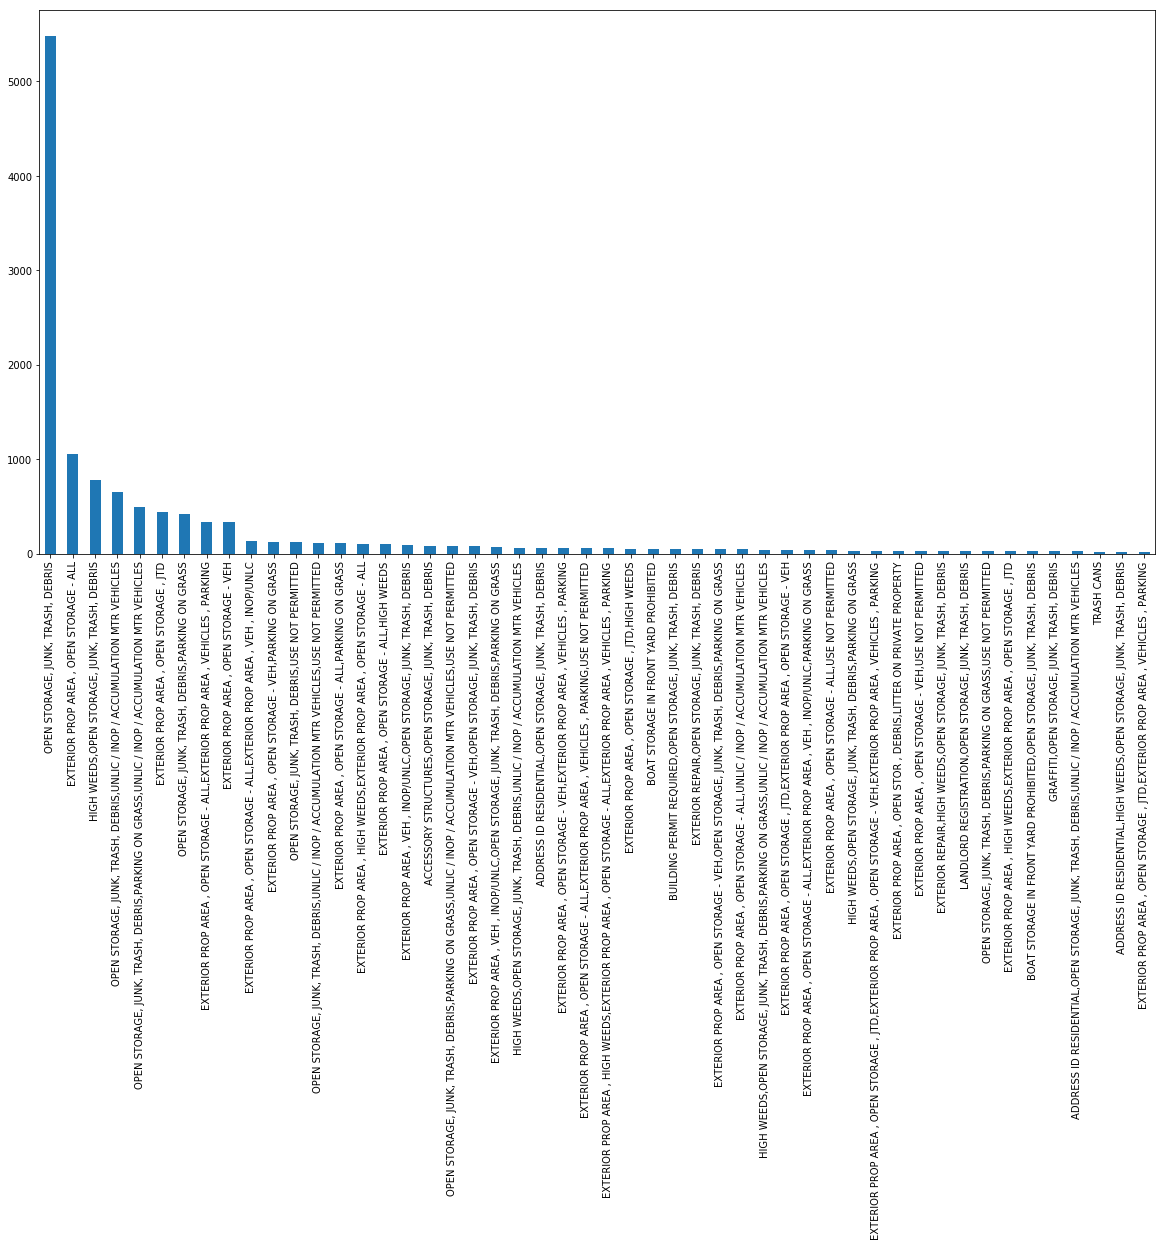

In [16]:
#Way too many things to display on one graph. Subdivide into equal parts and make subplots.
garbage_bar_top.plot.bar(figsize = (20,10))
plt.show()

In [22]:
pd.set_option('display.max_colwidth', -1)
psv_garbage[psv_garbage["violations_noted"].str.contains('|'.join(BeerBoard), case = False)]

,reported_problem,violations_noted,location
16363,"unsecured house; junk, trash & debris","BB purchase unauthorized wholesaler,Film, pics, reproductions depicting acts,OPEN STORAGE, JUNK, TRASH, DEBRIS","122 ELMHURST AVE\nNASHVILLE, TN 37207\n(36.196265, -86.773244)"
